### Import Libraries

In [5]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.style.use("ggplot")
%matplotlib inline

In [14]:
df_in = pd.read_csv("dataset-for-Machine-learning.csv")

### Build a KNN (k-Nearest Neighbors) Classifier

In [85]:
y = df_in["var80"]
perc_not_null = (df_in.count()/df_in.shape[0])*100 # this gives percentage of non-null entries
neighbors = np.arange(1, 11)
columns = np.linspace(5,25,5)
test_accuracy=np.empty([len(columns),len(neighbors)])
for i in np.arange(0,5):
    cols_to_select = df_in.columns[perc_not_null>=columns[i]]
    df_final = df_in[cols_to_select]
    df_final=df_final.fillna(0, axis=1)
    X = df_final.drop("var80", axis=1)
    for j in np.arange(0,10):
         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
         knn =KNeighborsClassifier(neighbors[j])
         knn.fit(X_train, y_train)
         test_accuracy[i,j] =knn.score(X_test, y_test)



In [86]:
p=pd.DataFrame(test_accuracy,index=[5,10,15,20,25],columns=neighbors)
p

,1,2,3,4,5,6,7,8,9,10
5,0.955665,0.960591,0.965517,0.960591,0.955665,0.955665,0.950739,0.950739,0.950739,0.955665
10,0.960591,0.965517,0.960591,0.960591,0.960591,0.950739,0.950739,0.950739,0.950739,0.955665
15,0.960591,0.965517,0.970443,0.970443,0.965517,0.970443,0.965517,0.970443,0.970443,0.970443
20,0.965517,0.965517,0.965517,0.970443,0.970443,0.970443,0.970443,0.965517,0.970443,0.965517
25,0.950739,0.960591,0.955665,0.960591,0.960591,0.960591,0.960591,0.950739,0.955665,0.950739


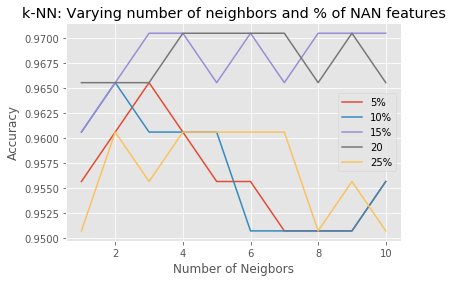

In [87]:
plt.plot(neighbors,p.loc[5],label="5%")
plt.plot(neighbors,p.loc[10],label ="10%")
plt.plot(neighbors,p.loc[15],label="15%")
plt.plot(neighbors,p.loc[20],label="20")
plt.plot(neighbors,p.loc[25],label="25%")
plt.xlabel("Number of Neigbors")
plt.ylabel("Accuracy")
plt.title("k-NN: Varying number of neighbors and % of NAN features")
plt.legend()
plt.show()